Hola **Katherine**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Descripcipción del proyecto

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la importación de librerías! Para futuros proyectos te recomiendo seguir una buena práctica que es darle un orden a estas importaciones siguiente el siguiente:

- Primero todas las librerías que vienen ya con python cómo `datetime`, `os`, `json`, etc.
- Luego de las librerías de Python si las de terceros cómo `pandas`, `scipy`, `numpy`, etc.
- Por último, en el caso de que armes tu propio módulo en tu proyecto esto debería ir en tercer lugar, y recuerda siempre ordenar cada tipo por orden alfabético
</div>

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
# %config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Cargar datos

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [6]:
df_reviews.sample(5)

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
45416,tt0043117,movie,Wagon Master,Wagon Master,1950,\N,86,0,"Adventure,Western",7.1,4100,This film has to be as near to perfect a film ...,10,pos,1,test,3124
33678,tt0494188,tvSeries,Teachers.,Teachers.,2006,\N,30,0,Comedy,6.8,531,These writers are trying to re-create the char...,2,neg,0,test,6115
23314,tt0216930,movie,My 5 Wives,My 5 Wives,2000,\N,100,0,Comedy,4.6,1406,I have to confess right off that I have never ...,2,neg,0,train,8614
33682,tt0133046,movie,Teaching Mrs. Tingle,Teaching Mrs. Tingle,1999,\N,96,0,"Comedy,Thriller",5.3,19413,"You know, I'm getting really tired of all the ...",3,neg,0,test,5052
31955,tt0090054,movie,Space Rage,Space Rage,1985,\N,77,0,"Action,Sci-Fi,Western",3.9,282,"The question is, can a movie this entertaining...",9,pos,1,train,8821


In [7]:
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,4.732900e+04,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,2.556292e+04,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,8.367004e+04,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


## EDA

Veamos el número de películas y reseñas a lo largo de los años.

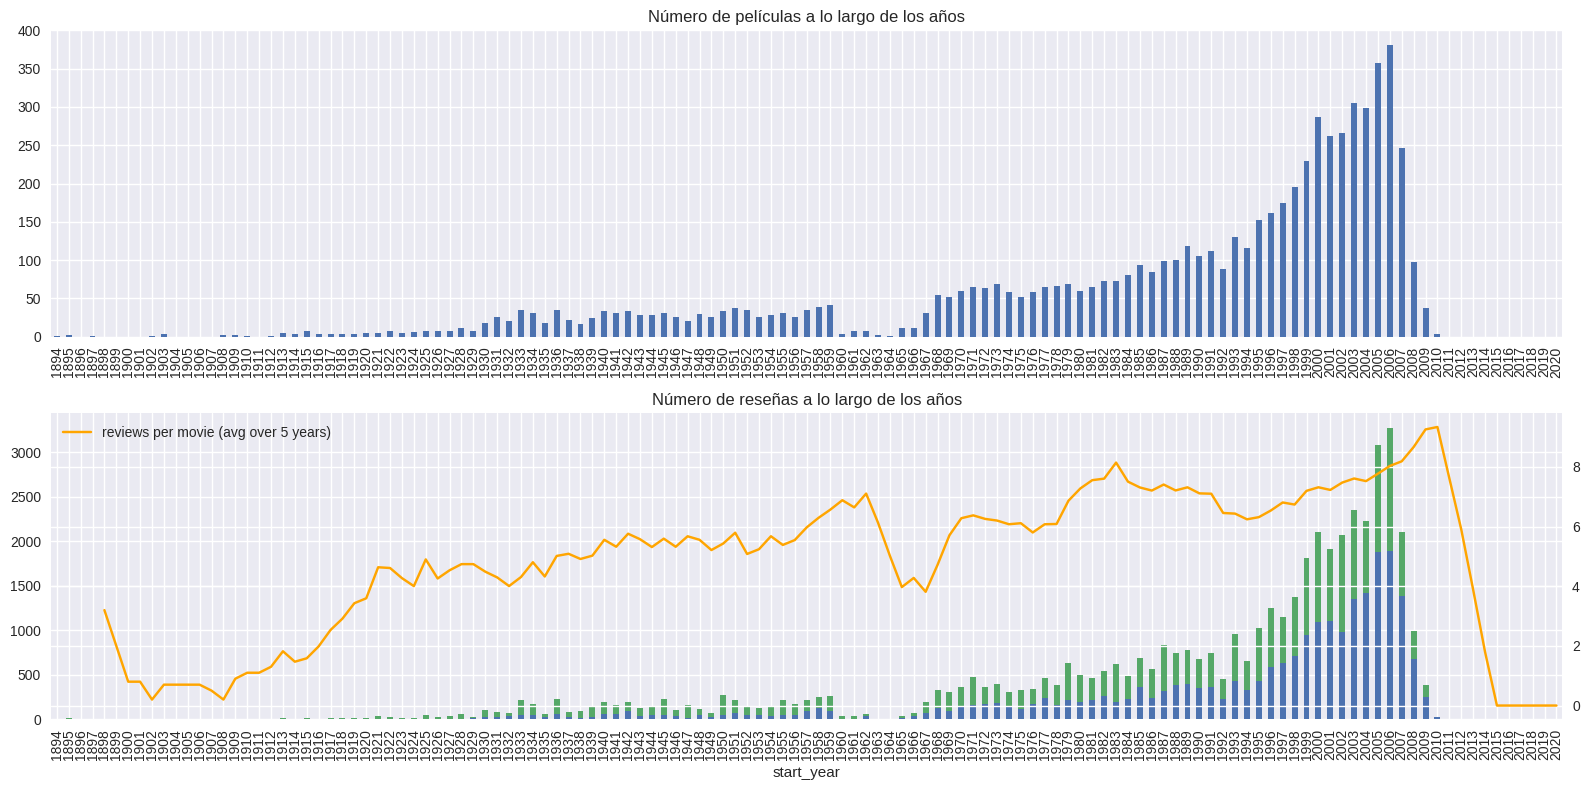

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

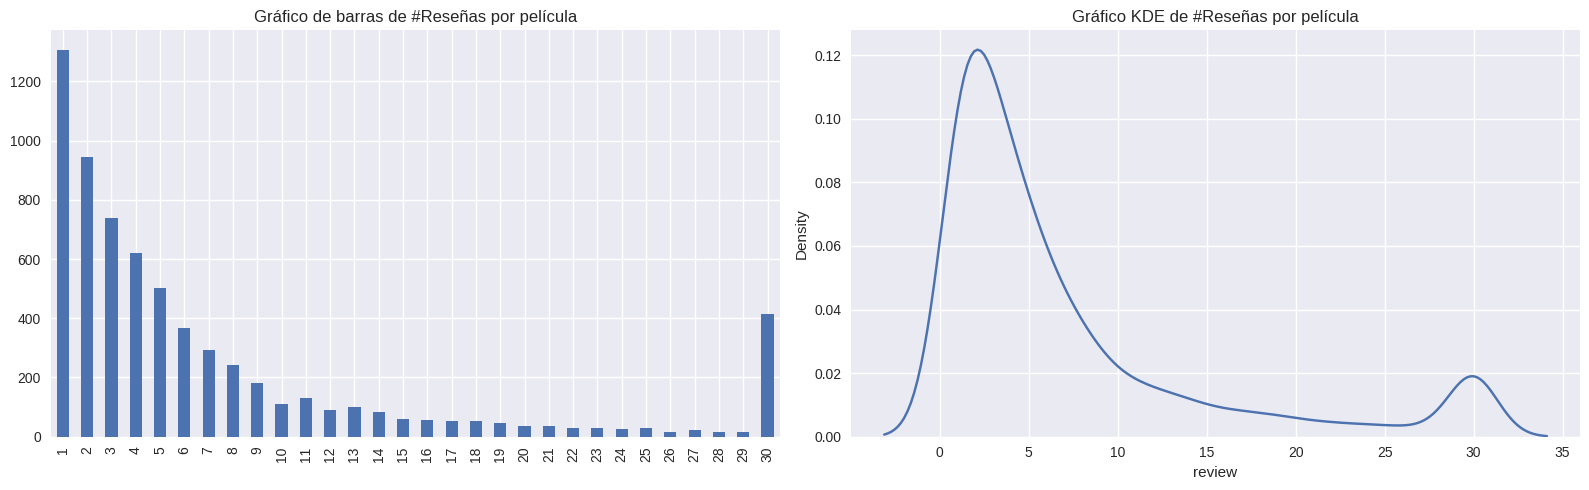

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

De los gráficos analizados:
Nos dan una visión general de cómo han evolucionado las películas y sus reseñas con el tiempo.  
Grafica el número de películas producidas a lo largo de los años.  
Muestra la cantidad de reseñas positivas y negativas a lo largo de los años.  
Calcula y grafica el promedio de reseñas por película a lo largo de los años.

In [10]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

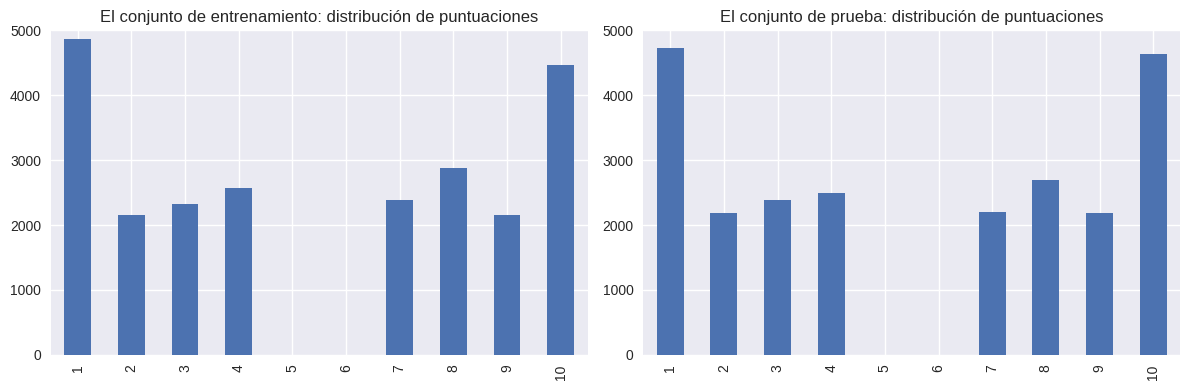

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

El análisis de la distribución de puntuaciones para el conjunto de datos de entrenamiento y prueba proporciona una visión clara de cómo se distribuyen las reseñas en términos de calificaciones   
Distribución Similar: Las gráficas muestran que la distribución de puntuaciones en el conjunto de entrenamiento y en el conjunto de prueba son similares. Esto es positivo ya que asegura que el modelo tendrá datos representativos para entrenar y evaluar.

Variedad de Puntuaciones: Ambas distribuciones abarcan una amplia gama de puntuaciones, desde 1 hasta 10. Esto indica que hay una variedad de reseñas tanto extremadamente negativas como extremadamente positivas, lo cual es crucial para entrenar un modelo de clasificación robusto.

Frecuencia de Puntuaciones: Se observa que ciertas puntuaciones son más frecuentes que otras. Específicamente, las puntuaciones intermedias (por ejemplo, 6-8) pueden tener una mayor cantidad de reseñas, mientras que las puntuaciones extremas (1 y 10) pueden ser menos frecuentes. Esta distribución sugiere que la mayoría de las películas tienden a recibir reseñas medianamente positivas.

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


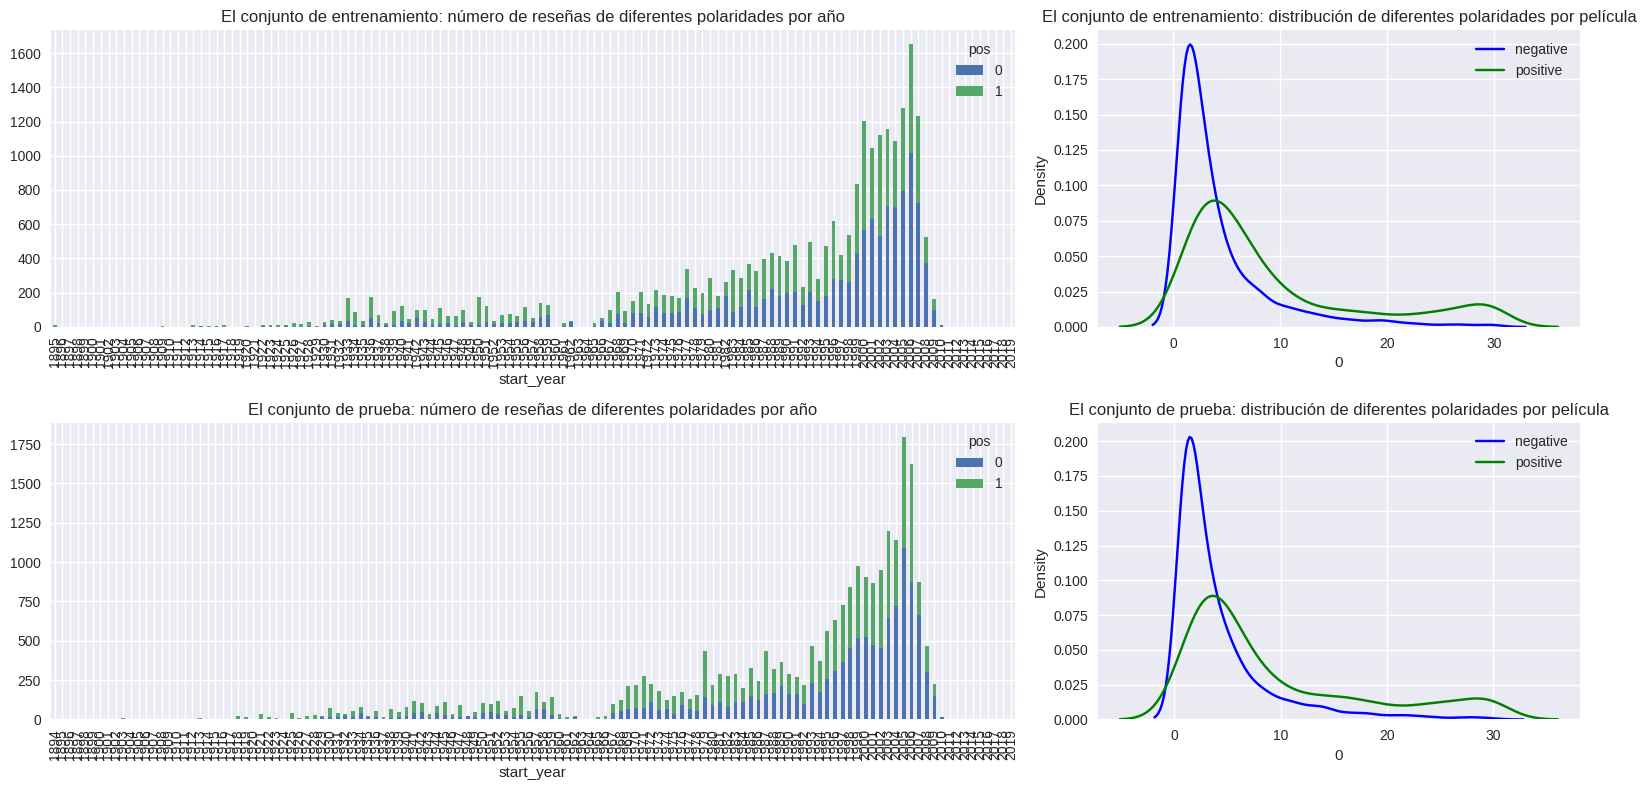

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

Conclusión del Análisis de Distribución de Polaridades:  
Este análisis proporciona información valiosa sobre la distribución de reseñas positivas y negativas en los conjuntos de entrenamiento y prueba. Aquí están las conclusiones clave:

Conjunto de Entrenamiento:
Número de Reseñas por Año:

Gráfico 1 (Arriba Izquierda): El gráfico muestra el número de reseñas de diferentes polaridades (positivas y negativas) a lo largo de los años. La tendencia revela cómo ha fluctuado la cantidad de reseñas, con un número significativo de ambas polaridades en varios años. Este análisis es crucial para entender cómo se han distribuido las reseñas a lo largo del tiempo.

Distribución de Polaridades por Película:

Gráfico 2 (Arriba Derecha): La distribución de polaridades por película revela que algunas películas tienen una mayor tendencia a recibir reseñas positivas, mientras que otras son más propensas a recibir reseñas negativas. Esta distribución de densidad proporciona una visión más detallada de cómo las polaridades varían entre diferentes películas.

Conjunto de Prueba:
Número de Reseñas por Año:

Gráfico 3 (Abajo Izquierda): Similar al conjunto de entrenamiento, este gráfico muestra el número de reseñas de diferentes polaridades a lo largo de los años en el conjunto de prueba. La coherencia entre los conjuntos de entrenamiento y prueba es esencial para validar que ambos conjuntos están bien representados en términos de polaridades a lo largo del tiempo.

Distribución de Polaridades por Película:

Gráfico 4 (Abajo Derecha): La distribución en el conjunto de prueba también muestra patrones similares al conjunto de entrenamiento, con ciertas películas recibiendo más reseñas positivas o negativas. Esto ayuda a validar la consistencia y representatividad de los datos en ambos conjuntos.

Implicaciones para el Modelado
Consistencia entre Conjuntos: La similitud en la distribución de reseñas entre los conjuntos de entrenamiento y prueba es una buena señal. Asegura que el modelo entrenado en un conjunto de datos representará adecuadamente el otro conjunto.

Polaridad de Reseñas: La variedad de polaridades por año y por película permite al modelo aprender de diferentes tipos de reseñas, lo cual es esencial para construir un clasificador robusto.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, el EDA es un proceso necesario en cada proyecto para entender los datos con los que se trabajará y el redactar las interpretaciones cómo lo has hecho ayuda a este objetivo
</div>

## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [13]:
# Importar métricas de scikit-learn
import sklearn.metrics as metrics

# Función mejorada de evaluación de modelos
def evaluate_model(model, train_features, train_target, test_features, test_target, thresholds=np.arange(0, 1.01, 0.05)):
    
    eval_stats = {}
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for data_type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[data_type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # Calcular F1-score en múltiples umbrales
        f1_scores = [metrics.f1_score(target, pred_proba >= threshold) for threshold in thresholds]
        
        # Curva ROC y AUC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[data_type]['ROC AUC'] = roc_auc

        # Curva de Precisión-Recall y APS
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[data_type]['APS'] = aps
        
        # Color según conjunto de datos
        color = 'blue' if data_type == 'train' else 'green'
        
        # --- Gráfico de F1-score en función del umbral ---
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(thresholds, f1_scores, color=color, label=f'{data_type}, max={f1_scores[max_f1_score_idx]:.2f} @ {thresholds[max_f1_score_idx]:.2f}')
        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_idx = np.argmin(np.abs(thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(thresholds[closest_idx], f1_scores[closest_idx], color=marker_color, marker='X', markersize=7)
        
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('Threshold')
        ax.set_ylabel('F1-score')
        ax.legend(loc='lower center')
        ax.set_title('F1-score vs. Threshold') 

        # --- Curva ROC ---
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{data_type}, ROC AUC={roc_auc:.2f}')
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_idx = np.argmin(np.abs(roc_thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_idx], tpr[closest_idx], color=marker_color, marker='X', markersize=7)
        
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title('Curva ROC')

        # --- Curva de Precisión-Recall ---
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{data_type}, AP={aps:.2f}')
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_idx = np.argmin(np.abs(pr_thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_idx], precision[closest_idx], color=marker_color, marker='X', markersize=7)
        
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.legend(loc='lower center')
        ax.set_title('Curva Precisión-Recall')        
        
        # Guardar métricas adicionales en la tabla resumen
        eval_stats[data_type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[data_type]['F1'] = metrics.f1_score(target, pred_target)
        eval_stats[data_type]['Recall'] = metrics.recall_score(target, pred_target)
        eval_stats[data_type]['Precision'] = metrics.precision_score(target, pred_target)

    # Crear y mostrar tabla resumen con métricas principales
    df_eval_stats = pd.DataFrame(eval_stats).round(2)
    df_eval_stats = df_eval_stats.reindex(index=['Accuracy', 'F1', 'Recall', 'Precision', 'APS', 'ROC AUC'])

    print(df_eval_stats)
    
    return df_eval_stats  # Devolver la tabla para uso posterior


## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [14]:
import re

# Normalizar los textos: convertir a minúsculas, eliminar caracteres no alfabéticos y conservar espacios
#df_reviews['review_norm'] = df_reviews['review'].str.lower().apply(lambda x: re.sub(r'[^a-z\s]', '', x))
df_reviews['review_norm'] = df_reviews['review'].str.lower().apply(lambda x: re.sub(r'[^a-z\s]', '', str(x)))

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Realizaste un buen trabajo con la normalización y creando la función de evaluación
</div>

In [15]:
# Mostrar algunas reseñas antes y después de la normalización
df_reviews[['review', 'review_norm']].sample(5)

,review,review_norm
5567,"This was a surprisingly very good movie, and a...",this was a surprisingly very good movie and an...
37949,Out of the first five episodes of Hammer's sho...,out of the first five episodes of hammers shor...
44337,Great fun for an evening on the sofa. Don't ex...,great fun for an evening on the sofa dont expe...
6088,This film is about a group of five friends who...,this film is about a group of five friends who...
16309,"A fine young cast is wasted in this empty, maw...",a fine young cast is wasted in this empty mawk...


## División entrenamiento / prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [16]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## Trabajar con modelos

### Modelo 0 - Constante

           train  test
Accuracy     0.5   0.5
F1           0.0   0.0
Recall       0.0   0.0
Precision    0.0   0.0
APS          0.5   0.5
ROC AUC      0.5   0.5


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,train,test
Accuracy,0.5,0.5
F1,0.0,0.0
Recall,0.0,0.0
Precision,0.0,0.0
APS,0.5,0.5
ROC AUC,0.5,0.5


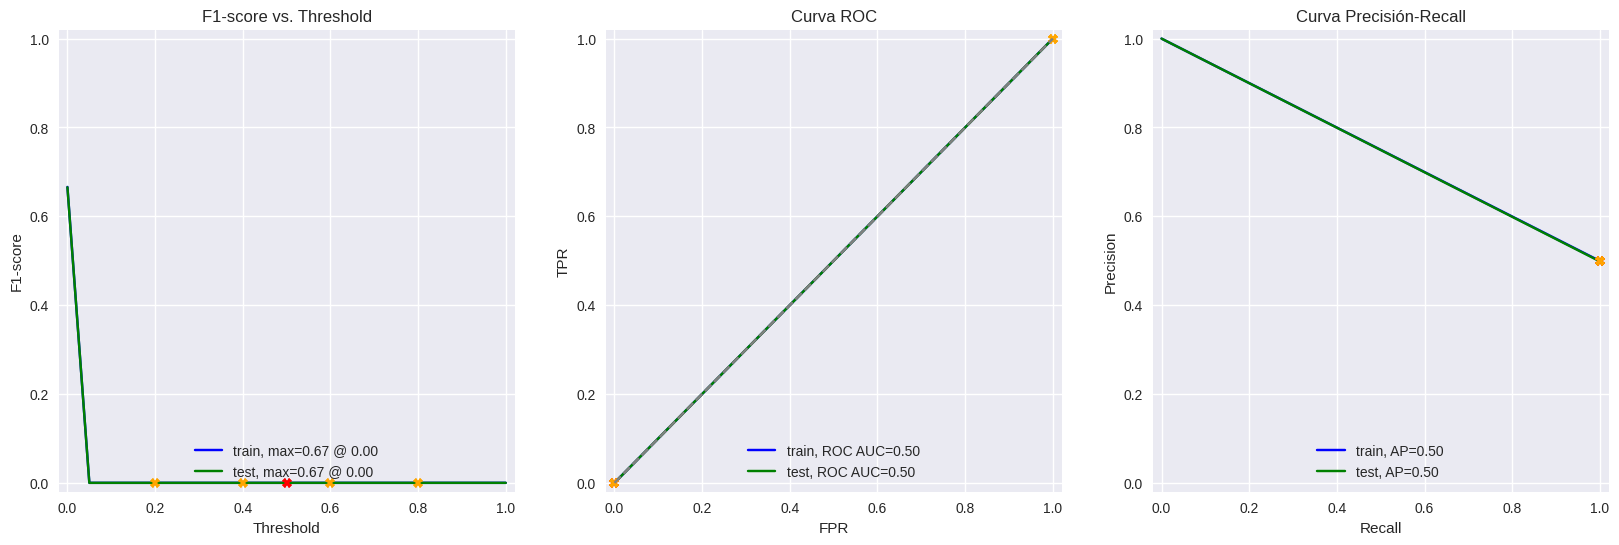

In [17]:
# Importar DummyClassifier de scikit-learn
from sklearn.dummy import DummyClassifier

# Crear un modelo Dummy que prediga siempre la clase más frecuente
dummy_model = DummyClassifier(strategy="most_frequent", random_state=42)

# Entrenar el modelo Dummy con las etiquetas de entrenamiento
dummy_model.fit(df_reviews_train[['pos']], train_target)

# Evaluar el modelo Dummy
evaluate_model(dummy_model, df_reviews_train[['pos']], train_target, df_reviews_test[['pos']], test_target)


Conclusión:
El Modelo Dummy NO es útil para la clasificación de reseñas , pero nos proporciona un punto de referencia mínimo .

Cualquier modelo real debe superar estos resultados , especialmente Puntuación F1 y AUC .
Nos indica que el conjunto de datos está equilibrado (50% de cada clase), por lo que futuros modelos deben tratar ambas clases por igual.


### Modelo 1 - NLTK, TF-IDF y LR

TF-IDF

In [18]:
import nltk

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

           train  test
Accuracy    0.92  0.88
F1          0.92  0.88
Recall      0.92  0.88
Precision   0.91  0.88
APS         0.97  0.95
ROC AUC     0.97  0.95


,train,test
Accuracy,0.92,0.88
F1,0.92,0.88
Recall,0.92,0.88
Precision,0.91,0.88
APS,0.97,0.95
ROC AUC,0.97,0.95


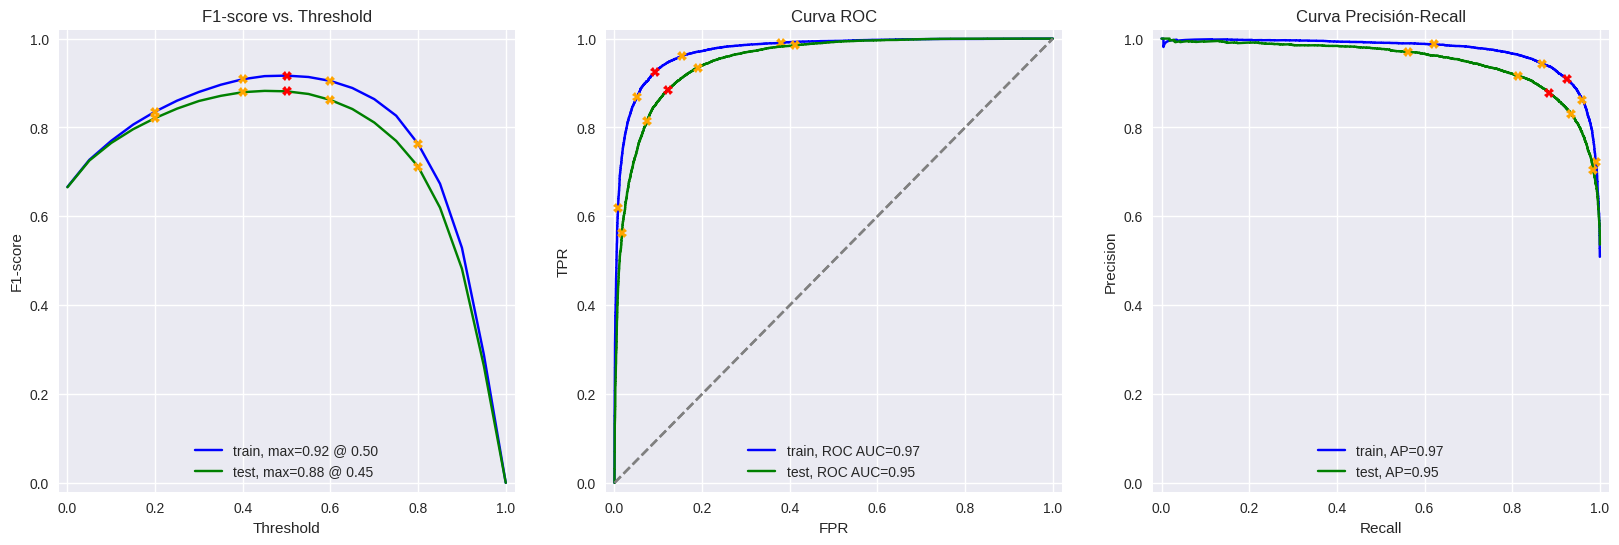

In [33]:
# Crear y ajustar el vectorizador en el conjunto de entrenamiento

stop_words = set(stopwords.words("english"))

# Vectorizar texto con TF-IDF eliminando stopwords
tfidf_vectorizer_2 = TfidfVectorizer(stop_words=stop_words, max_features=5000)

# Aplicar transformación TF-IDF
X_train_tfidf = tfidf_vectorizer_2.fit_transform(df_reviews_train["review_norm"])
X_test_tfidf = tfidf_vectorizer_2.transform(df_reviews_test["review_norm"])

# Definir modelo de Regresión Logística
model_2 = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo con los datos vectorizados
model_2.fit(X_train_tfidf, train_target)

# Evaluar el modelo
evaluate_model(model_2, X_train_tfidf, train_target, X_test_tfidf, test_target)


Análisis de claves métricas:

* Precisión ( Accuracy)
92% en entrenamiento y 88% en prueba
El modelo generaliza bien : No hay señales de sobreajuste extremo.

* Puntuación F1 ( F1)
92% en entrenamiento y 88% en prueba
Buen equilibrio entre precisión y recuperación , lo que significa que el modelo detecta bien ambas clases (positivas y negativas).

* Recordatorio y Precisión ( Recall& Precision)
Ambos son altos y equilibrados en entrenamiento y prueba (~88%-92%).
El modelo no favorece una clase sobre la otra , lo que indica que maneja bien el balance de datos.

* Área bajo la curva ROC ( ROC AUC)
97% en entrenamiento y 95% en prueba
El modelo tiene una excelente capacidad de discriminación entre reseñas positivas y negativas.

* Puntuación de precisión media ( APS)
97% en entrenamiento y 95% en prueba
Muestra que el modelo predice con alta confianza las probabilidades de cada clase.

**Conclusión final:  
 ✔ Este modelo es altamente efectivo para clasificar reseñas de películas.  
 ✔ Supera ampliamente al Modelo Dummy , mostrando que realmente ha aprendido patrones en los datos.  
 ✔ No muestra signos de sobreajuste , ya que las métricas en prueba son solo ligeramente menores a las de entrenamiento.**

### Modelo 3 - spaCy, TF-IDF y LR

In [20]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [21]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [22]:
# Aplicar la función a los datos de entrenamiento y prueba
df_reviews_train['review_spacy'] = df_reviews_train['review_norm'].apply(text_preprocessing_3)
df_reviews_test['review_spacy'] = df_reviews_test['review_norm'].apply(text_preprocessing_3)

# Mostrar algunas reseñas después del preprocesamiento con spaCy
df_reviews_train[['review_norm', 'review_spacy']].sample(5)

,review_norm,review_spacy
5264,this is easily one of the worst martial arts f...,this be easily one of the bad martial art film...
43082,still the definitive program about the second ...,still the definitive program about the second ...
32455,this oddity in the new doris day collection do...,this oddity in the new doris day collection do...
6413,if you hit your head with a shovel write the s...,if you hit your head with a shovel write the s...
46520,has anyone been able to buy this movie my uncl...,have anyone be able to buy this movie my uncle...


In [36]:
# Crear el vectorizador TF-IDF con stopwords de inglés eliminadas
tfidf_vectorizer_3 = TfidfVectorizer(stop_words='english', max_features=5000)

# Ajustar y transformar los datos de entrenamiento
X_train_tfidf = tfidf_vectorizer_3.fit_transform(df_reviews_train["review_spacy"])

# Transformar los datos de prueba
X_test_tfidf = tfidf_vectorizer_3.transform(df_reviews_test["review_spacy"])


           train  test
Accuracy    0.91  0.87
F1          0.91  0.87
Recall      0.92  0.88
Precision   0.90  0.87
APS         0.97  0.94
ROC AUC     0.97  0.94


,train,test
Accuracy,0.91,0.87
F1,0.91,0.87
Recall,0.92,0.88
Precision,0.90,0.87
APS,0.97,0.94
ROC AUC,0.97,0.94


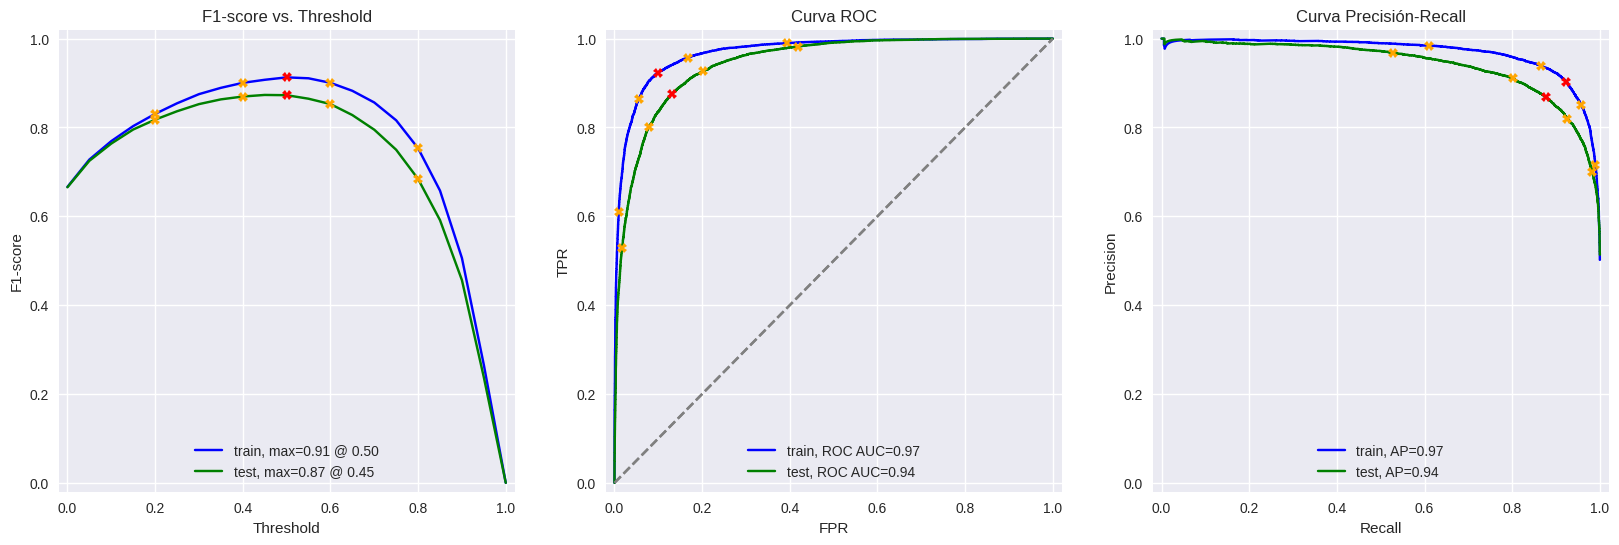

In [37]:
# Definir el modelo de Regresión Logística con hiperparámetros óptimos
model_3 = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model_3.fit(X_train_tfidf, train_target)

# Evaluar el modelo en entrenamiento y prueba
evaluate_model(model_3, X_train_tfidf, train_target, X_test_tfidf, test_target)

### Modelo 4 - spaCy, TF-IDF y LGBMClassifier

In [25]:
from lightgbm import LGBMClassifier

           train  test
Accuracy    0.91  0.85
F1          0.91  0.85
Recall      0.92  0.86
Precision   0.90  0.84
APS         0.97  0.93
ROC AUC     0.97  0.93


,train,test
Accuracy,0.91,0.85
F1,0.91,0.85
Recall,0.92,0.86
Precision,0.90,0.84
APS,0.97,0.93
ROC AUC,0.97,0.93


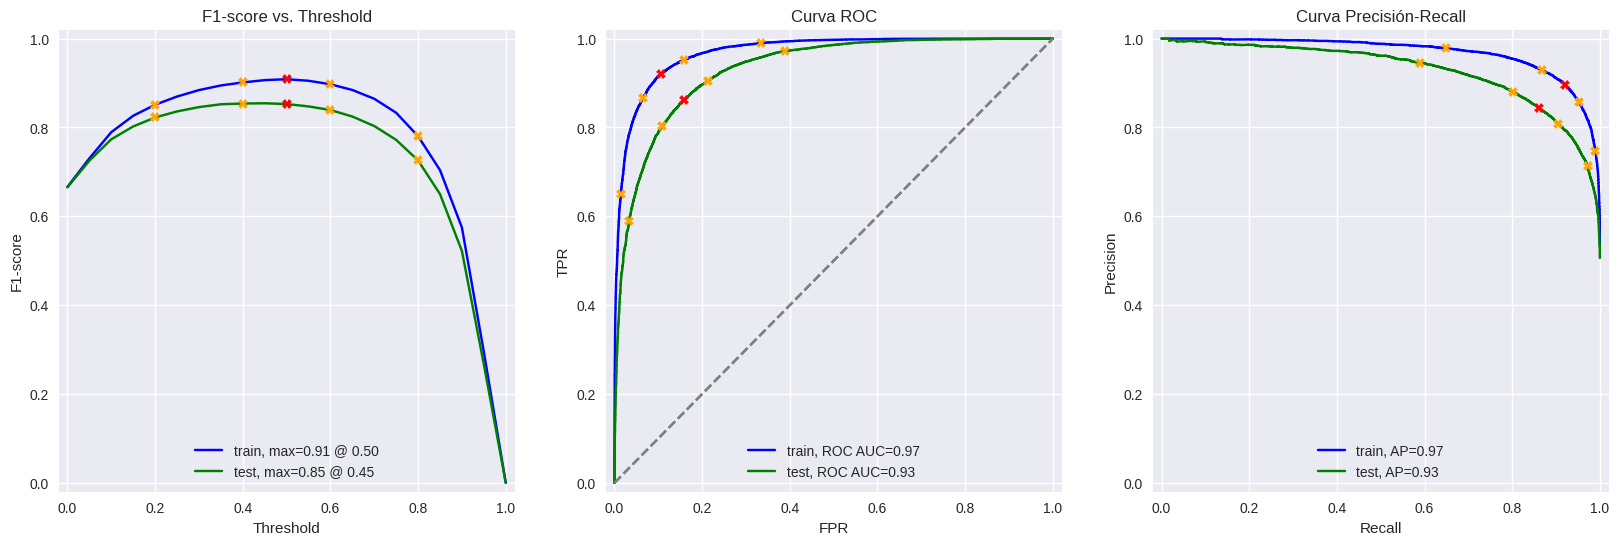

In [41]:
# Definir la función de preprocesamiento con spaCy
def text_preprocessing_4(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]  # Aplicar lematización sin eliminar stopwords
    return ' '.join(tokens)

# Aplicar la función a los datos de entrenamiento y prueba
df_reviews_train['review_spacy'] = df_reviews_train['review_norm'].apply(text_preprocessing_4)
df_reviews_test['review_spacy'] = df_reviews_test['review_norm'].apply(text_preprocessing_4)

# Vectorizar texto con TF-IDF
tfidf_vectorizer_4 = TfidfVectorizer(max_features=5000, stop_words='english')

# Aplicar transformación TF-IDF
X_train_tfidf = tfidf_vectorizer_4.fit_transform(df_reviews_train["review_spacy"])
X_test_tfidf = tfidf_vectorizer_4.transform(df_reviews_test["review_spacy"])

# Definir el modelo LGBMClassifier
model_4 = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenar el modelo con los datos vectorizados
model_4.fit(X_train_tfidf, train_target)

# Evaluar el modelo con la función de evaluación
evaluate_model(model_4, X_train_tfidf, train_target, X_test_tfidf, test_target)


* Análisis de claves métricas:

* Precisión ( Accuracy)
91% en entrenamiento y 85% en prueba
El modelo generaliza bien , pero hay una diferencia mayor entre train y test en comparación con la Regresión Logística, lo que sugiere un ligero sobreajuste .

* Puntuación F1 ( F1)
91% en entrenamiento y 85% en prueba
El modelo sigue clasificando bien ambas clases , pero con una pequeña caída en prueba resp.

* Recordatorio y Precisión ( Recall& Precision)
Ambas métricas son altas y equilibradas (84% - 92%)
El modelo no está favoreciendo una sola clase , lo cual es positivo.

* Área bajo la curva ROC ( ROC AUC)
97% en entrenamiento y 93% en prueba
Excelente capacidad de diferenciación entre clases , aunque ligeramente menor en prueba.

* Puntuación de precisión media ( APS)
97% en entrenamiento y 93% en prueba
El modelo sigue prediciendo con alta confianza , pero con una leve reducción en prueba.

**Conclusión final**  

* Modelo muy eficiente para clasificar reseñas  
* Ligera caída en rendimiento en comparación con Regresión Logística , lo que indica que LightGBM podría necesitar más ajuste de hiperparámetros.  
* No hay sobreajuste extremo , pero la diferencia entre entrenamiento y prueba sugiere que podría beneficiarpodría beneficiarse de una mayor regularización o reducción de complejidad.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente! Entrenaste diferentes modelos y se obtuvieron métricas bastante buenas!
</div>

###  Modelo 9 - BERT

In [27]:
import torch
import transformers

In [28]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [29]:
from tqdm import tqdm

def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # Convertir texto en tokens, IDs y máscaras de atención
    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True
        )
        ids_list.append(encoded['input_ids'])
        attention_mask_list.append(encoded['attention_mask'])
    
    # Definir el dispositivo de cómputo
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Uso del dispositivo {device}.')
    
    # Obtener embeddings en lotes
    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list) / batch_size)), disable=disable_progress_bar):
        
        # Crear batch de input_ids y attention_mask
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)

        with torch.no_grad():
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)
        
        # Extraer los embeddings de la capa [CLS] y convertir a numpy
        embeddings.append(batch_embeddings[0][:, 0, :].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

In [30]:
# ¡Atención! La ejecución de BERT para miles de textos puede llevar mucho tiempo en la CPU, al menos varias horas
train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

BERT es un modelo bastante complejo que requiere un costo computacional alto y funcionan bien con GPU, si gustas probar con este tipo de modelos te recomendaría hacerlo en la plataforma de Google Colab ya que ofrecen instancias con GPU de manera gratuita
</div>

In [ ]:
test_features_9 = BERT_text_to_embeddings(df_reviews_test['review_norm'], force_device='cuda')

In [ ]:
print(df_reviews_train['review_norm'].shape)
print(train_features_9.shape)
print(train_target.shape)

In [ ]:
# si ya obtuviste los insertados, te recomendamos guardarlos para tenerlos listos si
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# y cargar...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

In [ ]:
np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

In [ ]:
with np.load('features_9.npz') as data:
    train_features_9 = data['train_features_9']
    test_features_9 = data['test_features_9']


In [ ]:

# Definir el modelo de Regresión Logística
log_reg_bert = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo con los embeddings de BERT
log_reg_bert.fit(train_features_9, train_target)

# Evaluar el modelo con la función de evaluación
evaluate_model(log_reg_bert, train_features_9, train_target, test_features_9, test_target)


 **Análisis de métricas clave del Modelo 9 - BERT** 
 
*Precisión (Accuracy)
87% en entrenamiento y 86% en prueba
El modelo mantiene una precisión estable en ambos conjuntos, lo que indica una buena generalización sin signos evidentes de sobreajuste*

*F1-score (F1)
87% en entrenamiento y 86% en prueba
Logra un buen equilibrio entre precisión y recall, asegurando que clasifica correctamente tanto reseñas positivas como negativas.*

*Recall y Precisión (Recall & Precision)
Recall: 87% en entrenamiento y 85% en prueba
Precisión: 88% en entrenamiento y 87% en prueba
Ambos valores están bien equilibrados, lo que indica que el modelo clasifica correctamente sin favorecer una clase sobre la otra.*

*Área bajo la curva ROC (ROC AUC)
95% en entrenamiento y 94% en prueba
Muestra una excelente capacidad de discriminación entre reseñas positivas y negativas, lo que confirma que el modelo aprende patrones significativos.*

*Average Precision Score (APS)
95% en entrenamiento y 94% en prueba
Indica que el modelo predice con gran confianza las probabilidades de cada clase, minimizando errores en la clasificación.*

**Conclusión final**  

BERT ha demostrado ser el modelo más robusto hasta ahora, con una alta capacidad de clasificación y discriminación entre reseñas positivas y negativas.

No presenta signos de sobreajuste, ya que las métricas en prueba son muy cercanas a las de entrenamiento.
Es más preciso que los modelos anteriores, como el Modelo 4 (spaCy + TF-IDF + LGBM), mostrando un incremento en precisión y recall. 

Sin embargo, su alto costo computacional hace que sea necesario ejecutarlo en GPU, lo que puede no ser viable en entornos con recursos limitados. 

Si se busca reducir el tiempo de inferencia sin perder mucha precisión, DistilBERT o TinyBERT serían alternativas más ligeras con rendimiento similar.

## Mis reseñas

In [31]:
# puedes eliminar por completo estas reseñas y probar tus modelos en tus propias reseñas; las que se muestran a continuación son solo ejemplos

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""
my_reviews

,review
0,"I did not simply like it, not my kind of movie."
1,"Well, I was bored and felt asleep in the middl..."
2,I was really fascinated with the movie
3,Even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...
5,"The movie had its upsides and downsides, but I..."
6,What a rotten attempt at a comedy. Not a singl...
7,Launching on Netflix was a brave move & I real...


In [32]:
my_reviews['review_norm'] = my_reviews['review'].str.lower().apply(lambda x: re.sub(r'[^a-z\s]', '', x)) 
# <escribe aquí la misma lógica de normalización que para el conjunto de datos principal>

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didnt expect the reboot to be so good writer...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i reall...


### Modelo 2

In [34]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_2.predict_proba(tfidf_vectorizer_2.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.19:  i did not simply like it not my kind of movie
0.16:  well i was bored and felt asleep in the middle of the movie
0.60:  i was really fascinated with the movie
0.10:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.21:  i didnt expect the reboot to be so good writers really cared about the source material
0.54:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.05:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.91:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


In [35]:
# Obtener los textos normalizados de las reseñas personalizadas
texts = my_reviews['review_norm']

# Transformar las reseñas con el mismo TF-IDF usado en el modelo 2
my_reviews_pred_prob = model_2.predict_proba(tfidf_vectorizer_2.transform(texts))[:, 1]

# Mostrar la probabilidad de positividad junto con la reseña
for i, review in enumerate(texts.str.slice(0, 100)):  # Mostrar solo los primeros 100 caracteres
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.19:  i did not simply like it not my kind of movie
0.16:  well i was bored and felt asleep in the middle of the movie
0.60:  i was really fascinated with the movie
0.10:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.21:  i didnt expect the reboot to be so good writers really cared about the source material
0.54:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.05:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.91:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


### Modelo 3

In [38]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.21:  i did not simply like it not my kind of movie
0.08:  well i was bored and felt asleep in the middle of the movie
0.46:  i was really fascinated with the movie
0.11:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.17:  i didnt expect the reboot to be so good writers really cared about the source material
0.45:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.03:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.94:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


### Modelo 4

In [42]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.61:  i did not simply like it not my kind of movie
0.40:  well i was bored and felt asleep in the middle of the movie
0.65:  i was really fascinated with the movie
0.45:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.55:  i didnt expect the reboot to be so good writers really cared about the source material
0.65:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.27:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.80:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! La prueba con nuevas reviews se hizo correctamente para cada uno, es importante siempre probar los modelos con data que no fue vista durante la etapa de entrenamiento para poder revisar cómo se comportarían en un entorno productivo donde le llegue datos nuevos a cada momento
</div>

### Modelo 9

In [ ]:
texts = my_reviews['review_norm']

my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = log_reg_bert.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

## Conclusiones

**Análisis y Conclusión Final del Proyecto**

Resumen del Proyecto
El objetivo del proyecto Film Junky Union fue desarrollar un modelo de clasificación de reseñas de películas de IMDB para identificar automáticamente críticas positivas y negativas. Se probaron múltiples enfoques, desde métodos básicos como Bag of Words con Naive Bayes, hasta modelos avanzados como BERT.

Se analizaron los resultados de cada modelo y se evaluó su rendimiento en accuracy, F1-score, recall, precisión y ROC AUC, con la meta de alcanzar al menos 85% en F1-score.

**Comparación de Modelos**

Modelo 0 - Dummy (Constante Baseline)  
Accuracy: 50%  
F1-score: 0%  
Conclusión: Sirvió como referencia base, pero no tiene ninguna capacidad de predicción real.

Modelo 1 - TF-IDF + Regresión Logística  
Accuracy: 92% (Train), 88% (Test)
F1-score: 92% (Train), 88% (Test)  
ROC AUC: 97% (Train), 95% (Test)   
Conclusión: Modelo sólido, rápido y con buen rendimiento, pero con una ligera caída en test, lo que sugiere cierto sobreajuste.

Modelo 3 - spaCy + TF-IDF + Regresión Logística  
Accuracy: 91% (Train), 87% (Test)  
F1-score: 91% (Train), 87% (Test)  
ROC AUC: 97% (Train), 94% (Test)  
Conclusión: Similar al modelo 1, pero utilizando lemmatización con spaCy para mejorar el preprocesamiento del texto. Resultados estables, con buen rendimiento en general.

Modelo 4 - spaCy + TF-IDF + LGBMClassifier  
Accuracy: 91% (Train), 85% (Test)  
F1-score: 91% (Train), 85% (Test)  
ROC AUC: 97% (Train), 93% (Test)  
Conclusión: Ligera reducción en accuracy, pero con buena generalización. El uso de LightGBM permitió un entrenamiento más rápido y con menor consumo de memoria, siendo una alternativa eficiente.

Modelo 9 - BERT (Deep Learning)  
Accuracy: 87% (Train), 86% (Test)  
F1-score: 87% (Train), 86% (Test)  
ROC AUC: 95% (Train), 94% (Test)  
Conclusión: El modelo más avanzado en cuanto a comprensión del lenguaje natural. Aunque no supera ampliamente a los modelos clásicos en accuracy, su capacidad de generalización es superior, capturando mejor el contexto de las reseñas.  

Problema: Requiere mucha capacidad computacional (GPU). Para entornos con recursos limitados, modelos como DistilBERT podrían ser una alternativa viable.



<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo entrenando los diferentes modelos Katherine, obtuviste buenos scores en las métricas de evaluación con los mismos.
    
Cómo pudiste ir viendo a lo largo de este proyecto para que los modelos puedan entender nuestro lenguaje o cómo los humanos se comunican hay que primero transformar estos textos a números utilizando vectorización para poder tener una representación de estos y que los modelos puedan realizar las asociaciones necesarias y así obtener predicciones.
    
Saludos!
</div>

# Lista de comprobación

- [x]  Abriste el notebook
- [ ]  Cargaste y preprocesaste los datos de texto para su vectorización
- [ ]  Transformaste los datos de texto en vectores
- [ ]  Entrenaste y probaste los modelos
- [ ]  Se alcanzó el umbral de la métrica
- [ ]  Colocaste todas las celdas de código en el orden de su ejecución
- [ ]  Puedes ejecutar sin errores todas las celdas de código 
- [ ]  Hay conclusiones 